# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

# Lecture and Lab

## Load Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [ ]:
!rm titanic_train.csv
!wget https://github.com/davidjohnnn/all_datasets/raw/master/bay/titanic_train.csv

--2024-09-20 13:24:30--  https://github.com/davidjohnnn/all_datasets/raw/master/bay/titanic_train.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davidjohnnn/all_datasets/master/bay/titanic_train.csv [following]
--2024-09-20 13:24:31--  https://raw.githubusercontent.com/davidjohnnn/all_datasets/master/bay/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2024-09-20 13:24:31 (4.90 MB/s) - ‘titanic_train.csv’ saved [60302/60302]



In [ ]:
df = pd.read_csv('https://github.com/davidjohnnn/all_datasets/raw/master/bay/titanic_train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop('PassengerId',axis=1,inplace=True)

In [ ]:
# simple version & keep only Age, Sex, Survived
# in the full version, remove this code
df = df[['Age', 'Sex', 'Survived']]

## Prepare Data

Let's begin some exploratory data analysis! We'll start by checking out missing data!



### Check Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Survived  891 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

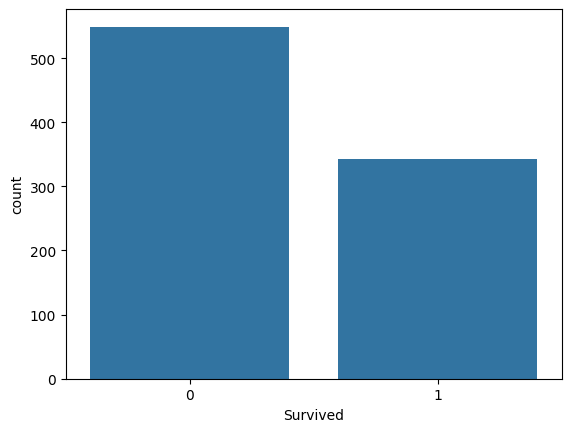

In [ ]:
print(df['Survived'].value_counts())
sns.countplot(x='Survived', data=df)

___
### Data Cleansing


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
# check again!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Survived  891 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


### Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [ ]:
sex.head(3)

,male
0,True
1,False
2,False


In [ ]:
df.drop(['Sex'], axis=1,inplace=True)

In [ ]:
df = pd.concat([df,sex],axis=1)

In [ ]:
df.head()

,Age,Survived,male
0,22.0,0,True
1,38.0,1,False
2,26.0,1,False
3,35.0,1,False
4,35.0,0,True


Great! Our data is ready for our model!

## Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).



### Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=101)

### Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(list(y_test[:5]))
print(y_pred[:5])

[0, 0, 0, 1, 0]
[0 0 0 0 1]


Let's move on to evaluate our model!

### Evaluation

We can check precision,recall,f1-score using classification report!

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[142,  23],
       [ 45,  58]])

In [ ]:
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7594    0.8606    0.8068       165
           1     0.7160    0.5631    0.6304       103

    accuracy                         0.7463       268
   macro avg     0.7377    0.7119    0.7186       268
weighted avg     0.7427    0.7463    0.7390       268



### Check model parameters

In [ ]:
print(X.columns)
print(model.intercept_)
print(model.coef_)

Index(['Age', 'male'], dtype='object')
[1.05345203]
[[-2.98814705e-04 -2.62408402e+00]]


# Tasks

1. ให้นิสิตส่ง Colab Link และ ไฟล์ รหัสนิสิต_inclass_logistic.ipynb ใน MyCourseVille ที่รันบนชุดข้อมูล Titanic ดังแสดงไว้ Session Lab ในคาบเรียน

2. ให้นิสิตนำ Demo Titanic ในคาบเรียนมาปรับใช้เพื่อแก้โจทย์ปัญหาดังนี้

    2.1 Use all variables

    2.2 Impute missing values

        - Impute categorical with mode
        - Improve how to impute “Age”. Rather than just using an average for the whole passengers, we should impute age differently for each passenger class (Pclass).

    2.3 Some variables should be dropped manually.

    2.4 Evaluate and compare these improvements in 2.1-2.2 to the simple model in Demo which are applied 2 variables i.e. Age, Sex.  Student can report in terms of Macro F1; which one is better?
    
    2.5 Compute odds ratio for “Age” and Explain (Hint อายุเพิ่ม 1 ปี ส่งผลให้ค่า odd เพิ่มขึ้น/ลดลง กี่ %)

3. ให้นิสิตสร้าง Textbox ลงใน Notebook ใน Cell ล่างสุดเพื่อเขียนรายงานผลลัพธ์การทดลองในข้อที่ 2 รวมข้อย่อยด้วย

## Load the Data

In [ ]:
# Load the data
df = pd.read_csv('https://github.com/davidjohnnn/all_datasets/raw/master/bay/titanic_train.csv')
df.drop('PassengerId', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Data pre-processing

1. Impute missing values for categorical variables with mode
2. Impute missing 'Age' based on passenger class
3. Drop unnecessary columns

In [ ]:
# Data Cleansing and Feature Engineering
# 1. Impute missing values for categorical variables with mode
for col in ['Embarked', 'Cabin']: df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# 2. Impute missing 'Age' based on passenger class
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# 3. Drop unnecessary columns
df.drop(['Ticket', 'Name'], axis=1, inplace=True)

In [ ]:
# Convert categorical features to dummy variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Cabin'], drop_first=True)

## Model 0 (Simple)

In [ ]:
# Extract the necessary data for the simple model
df_simple = df[['Age', 'Sex_male', 'Survived']]

# Split data into training and testing sets for the simple model
X_simple = df_simple.drop('Survived', axis=1)
y_simple = df_simple['Survived']
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, stratify=y_simple, test_size=0.30, random_state=101
)

# Train the simple model
model_simple = LogisticRegression(max_iter=1000)
model_simple.fit(X_train_simple, y_train_simple)
y_pred_simple = model_simple.predict(X_test_simple)

# Evaluate the simple model
print("Simple Model Evaluation:")
print(confusion_matrix(y_test_simple, y_pred_simple, labels=[0, 1]))
print(classification_report(y_test_simple, y_pred_simple, digits=4))

Simple Model Evaluation:
[[142  23]
 [ 45  58]]
              precision    recall  f1-score   support

           0     0.7594    0.8606    0.8068       165
           1     0.7160    0.5631    0.6304       103

    accuracy                         0.7463       268
   macro avg     0.7377    0.7119    0.7186       268
weighted avg     0.7427    0.7463    0.7390       268



## Model 1 (Full variable)

### Train Data

In [ ]:
# Building a Logistic Regression model
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=101)

In [ ]:
# Training and Predicting
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


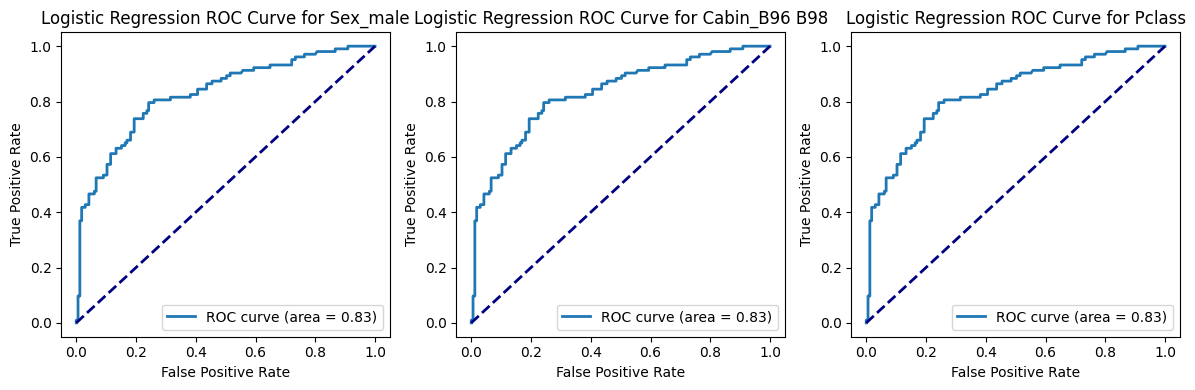

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate the correlation between X_test variables and y_test
correlations = X_test.corrwith(pd.Series(y_test, index=X_test.index))

# Get the top 3 X_test variables with the highest correlation
top_3_features = correlations.abs().sort_values(ascending=False).head(3).index.tolist()

# Plot the logistic regression curve for the top 3 features
plt.figure(figsize=(12, 4))
for i, feature in enumerate(top_3_features):
  plt.subplot(1, 3, i + 1)
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Logistic Regression ROC Curve for ' + feature)
  plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

### Evaluation

In [ ]:
# Evaluation
print(confusion_matrix(y_test, y_pred, labels = [0, 1]))
print(classification_report(y_test, y_pred, digits = 4))

[[143  22]
 [ 38  65]]
              precision    recall  f1-score   support

           0     0.7901    0.8667    0.8266       165
           1     0.7471    0.6311    0.6842       103

    accuracy                         0.7761       268
   macro avg     0.7686    0.7489    0.7554       268
weighted avg     0.7736    0.7761    0.7719       268



In [ ]:
# Check model parameters
print(X.columns)
print(model.intercept_)
print(model.coef_)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Cabin_A14', 'Cabin_A16',
       ...
       'Cabin_E8', 'Cabin_F E69', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2',
       'Cabin_F33', 'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_T'],
      dtype='object', length=154)
[5.15109213]
[[-0.99966359 -0.04263992 -0.30858944 -0.17987289  0.00355679 -2.84832713
   0.2082765  -0.04603409 -0.37522237  0.11471145 -0.35766396  0.
   0.78103152 -0.42372432  0.59236216  0.         -0.37386231  0.22575802
  -0.32486152 -0.14805086  0.         -0.23027621  0.14345787 -0.3403936
   0.11037444 -0.19457605  0.45449988 -0.03752283  0.17777965  0.05191363
   0.          0.06400726 -0.21709911 -0.29645294  0.0460221   0.
   0.68636588  0.          0.37310672  0.02521782  0.         -0.37568148
   0.03287248 -0.5159225   0.13408272 -0.36528368  0.039641    0.04062694
   0.          0.02367415  0.09149397 -0.33062255 -0.51294361 -0.31720925
  -0.46172803  0.        

___
## Model 2 (Selection variable)

In [ ]:
# Identify features with low importance based on coefficients
feature_importance = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
feature_importance['abs_coefficient'] = feature_importance['coefficient'].abs()
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

feature_importance

,feature,coefficient,abs_coefficient
5,Sex_male,-2.848327,2.848327
0,Pclass,-0.999664,0.999664
76,Cabin_C49,-0.790989,0.790989
12,Cabin_A23,0.781032,0.781032
125,Cabin_E121,0.762966,0.762966
...,...,...,...
107,Cabin_D30,0.000000,0.000000
112,Cabin_D45,0.000000,0.000000
116,Cabin_D49,0.000000,0.000000
20,Cabin_A6,0.000000,0.000000


### Selection Model

I will drop variable ,which | CORR | < 0.1

In [ ]:
# Dropping features with an absolute coefficient below 0.1
features_to_drop = feature_importance[feature_importance['abs_coefficient'] < 0.1]['feature'].tolist()
len(features_to_drop)  # Number of features to drop

65

### Train Data

In [ ]:
# Create a new dataset without the dropped features
X_new = X.drop(features_to_drop, axis=1)
# print(len(X_new.columns)) # 89
# Split the new dataset into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y, stratify=y, test_size=0.30, random_state=101
)

# Train a new model with the reduced feature set
model_new = LogisticRegression(max_iter=1000)
model_new.fit(X_train_new, y_train_new)

# Make predictions using the new model
y_pred_new = model_new.predict(X_test_new)

### Evaluation

In [ ]:
# Evaluate the new model
print(confusion_matrix(y_test_new, y_pred_new, labels=[0, 1]))
print(classification_report(y_test_new, y_pred_new, digits=4))

[[148  17]
 [ 44  59]]
              precision    recall  f1-score   support

           0     0.7708    0.8970    0.8291       165
           1     0.7763    0.5728    0.6592       103

    accuracy                         0.7724       268
   macro avg     0.7736    0.7349    0.7442       268
weighted avg     0.7729    0.7724    0.7638       268



Between Model 1 has accuracy 0.7761 ,which has full variable in model and Model 2 has accuracy 0.7724 ,but has only 89 variable and them have correlation > 0.1.

In [ ]:
## Evaluate and compare to the simple model in Demo (model) which are applied 2 variables i.e. Age, Sex.  Student can report in terms of Macro F1; which one is better?

# Calculate Macro F1 score for the simple model
f1_simple = f1_score(y_test_simple, y_pred_simple, average='macro')
print(f"Macro F1 score for Simple Model: {f1_simple}")

# Calculate Macro F1 score for the full model (Model 1)
f1_full = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 score for Full Model: {f1_full}")

# Calculate Macro F1 score for the selection model (Model 2)
f1_selection = f1_score(y_test_new, y_pred_new, average='macro')
print(f"Macro F1 score for Selection Model: {f1_selection}")

print("-"*60)

# Compare the Macro F1 scores
if f1_full > f1_simple and f1_full > f1_selection:
  print("The Full Model has the best Macro F1 score.")
elif f1_selection > f1_simple and f1_selection > f1_full:
  print("The Selection Model has the best Macro F1 score.")
else:
  print("The Simple Model has the best Macro F1 score.")

Macro F1 score for Simple Model: 0.7186264822134387
Macro F1 score for Full Model: 0.7554000608457561
Macro F1 score for Selection Model: 0.7441747648780181
------------------------------------------------------------
The Full Model has the best Macro F1 score.


## Compute odds ratio for “Age” and Explain in simple model, model 1 and model_new


In [ ]:
## Compute odds ratio for “Age” and Explain in simple model, model 1 and model_new

# Compute odds ratio for "Age" in the simple model
print("Odds Ratio for Age in the Simple Model:")
odds_ratio_simple = np.exp(model_simple.coef_[0][0])
print(f"Odds Ratio: {round(odds_ratio_simple, 3)}")

if odds_ratio_simple > 1:
    print(f"อายุเพิ่ม 1 ปี ส่งผลให้ค่า odd เพิ่มขึ้น {round((odds_ratio_simple - 1) * 100, 2)}%.")
else:
    print(f"อายุเพิ่ม 1 ปี ส่งผลให้ค่า odd ลดลง {round((odds_ratio_simple - 1) * 100, 2)}%.")

print("-"*50)
#-----------------------------------------------------------------------------------------
# Compute odds ratio for "Age" in the full model (Model 1)
print("Odds Ratio for Age in the Full Model:")
age_index = list(X.columns).index('Age')
odds_ratio_full = np.exp(model.coef_[0][age_index])
print(f"Odds Ratio: {round(odds_ratio_full, 3)}")

if odds_ratio_full > 1:
    print(f"อายุเพิ่ม 1 ปี ส่งผลให้ค่า odd เพิ่มขึ้น {round((odds_ratio_full - 1) * 100, 2)}%.")
else:
    print(f"อายุเพิ่ม 1 ปี ส่งผลให้ค่า odd ลดลง {round((1 - odds_ratio_full) * 100, 2)}%.")

print("-"*50)
#-----------------------------------------------------------------------------------------
# Compute odds ratio for "Age" in the selection model (Model 2)
print("Odds Ratio for Age in the New Model:")
if 'Age' in X_new.columns:
    age_index_new = list(X_new.columns).index('Age')
    odds_ratio_new = np.exp(model_new.coef_[0][age_index_new])
    print(f"Odds Ratio: {round(odds_ratio_new, 3)}")

    if odds_ratio_new > 1:
        print(f"อายุเพิ่ม 1 ปี ส่งผลให้ค่า odd เพิ่มขึ้น {round((odds_ratio_new - 1) * 100, 2)}%.")
    else:
        print(f"อายุเพิ่ม 1 ปี ส่งผลให้ค่า odd ลดลง {round((1 - odds_ratio_new) * 100, 2)}%.")

else:
    print("ตัวแปรอายุไม่อยู่ใน Model")

Odds Ratio for Age in the Simple Model:
Odds Ratio: 1.003
อายุเพิ่ม 1 ปี ส่งผลให้ค่า odd เพิ่มขึ้น 0.34%.
--------------------------------------------------
Odds Ratio for Age in the Full Model:
Odds Ratio: 0.958
อายุเพิ่ม 1 ปี ส่งผลให้ค่า odd ลดลง 4.17%.
--------------------------------------------------
Odds Ratio for Age in the New Model:
ตัวแปรอายุไม่อยู่ใน Model


# Conclusion

1. ข้อมูลที่เป็น Missing Value ได้แทนที่ด้วย
   - จำพวก Categorical (เช่น เพศ) ด้วย ฐานนิยม (Mode)
   - จำพวก Numerical (เช่น อายุ)  ด้วย มัธยฐาน (Median)

2. จากการสร้างโมเดลแล้ว ได้ผลลัพธ์ดังนี้
      - Simple Model (ใช้เพียง Age, Sex) ได้ค่า Accuracy = 0.7463
      - Full Model (ใช้ทุกตัวแปร) ได้ค่า Accuracy = 0.7761
      - Selected Model (ใช้เพียงตัวแปรที่มีขนาด Correlation > 0.1) ได้ค่า Accuracy = 0.7724

3. เมื่อพิจารณาจาก Macro F1 พบว่า Full Model มีค่าสูงสุดที่ 0.755, Selected Model 0.744 และ Simple Model 0.718 ตามลำดับ แสดงให้เห็นว่าจากทั้ง 3 โมเดลนี้ Full Model หรือการไม่ตัวตัวแปรใด ๆ ออกเลย ทำให้โมเดลมีประสิทธิภาพที่ดีกว่า ทั้งนี้อาจต้องระวังเรื่อง Overfitted เสียด้วย
